# (Ocassionally) Dishonest Casino Example

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import seed, choice

In [7]:
%config InlineBackend.figure_format = "retina"

plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False

In [2]:
states = np.array([0, 1])
obs_states = np.arange(1, 7)

A = np.array([
    [0.95, 0.05],
    [0.10, 0.90]
])

px = np.array([
    [1/6, 1/6, 1/6, 1/6, 1/6, 1/6], # fair die
    [1/10, 1/10, 1/10, 1/10, 1/10, 5/10] # loaded die
])

π = np.array([1, 1]) / 2

In [8]:
seed(314)
n_samples = 300

zt = choice(states, p=π)
xt = choice(obs_states, p=px[zt])

z_hist = np.zeros(n_samples, dtype=int)
x_hist = np.zeros(n_samples, dtype=int)

z_hist[0] = zt
x_hist[0] = xt
for t in range(1, n_samples):
    zt = choice(states, p=A[zt])
    xt = choice(obs_states, p=px[zt])
    
    z_hist[t] = zt
    x_hist[t] = xt

In [11]:
z_hist_str = "".join((z_hist + 1).astype(str))[:60]
x_hist_str = "".join(x_hist.astype(str))[:60]

print(f"x: {x_hist_str}")
print(f"z: {z_hist_str}")

x: 666333434452361543336162146653316146656663144434652652444446
z: 222222221111111111111111111111111112222222222222222211111111


In [86]:
def find_dishonest_intervals(z_hist):
    spans = []
    x_init = 0
    t = x_init
    for t, _ in enumerate(z_hist[:-1]):
        if z_hist[t+1] == 0 and z_hist[t] == 1:
            x_end = t
            spans.append((x_init, x_end))
        elif z_hist[t+1] == 1 and z_hist[t] == 0:
            x_init = t+1
    
    return spans

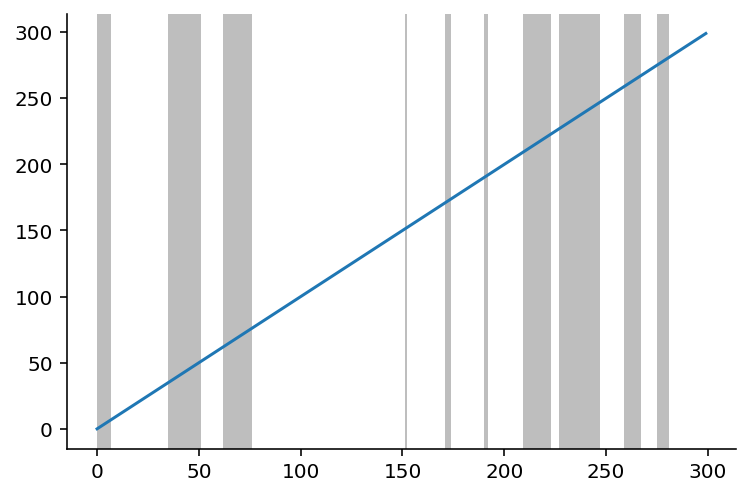

In [87]:

fig, ax = plt.subplots()

spans = find_dishonest_intervals(z_hist)
ax.plot(xrange)
for span in spans:
    ax.axvspan(*span, alpha=0.5, facecolor="tab:gray", edgecolor="none")

## The scaled-forward step